In [55]:
import pandas as pd
import numpy as np


bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [56]:
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [57]:
bank_note_data.isnull().sum()

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

In [58]:
bank_note_data.shape

(1096, 5)

In [59]:
X = bank_note_data.drop('Class', axis=1) #Input variables
# axis=1 indicates that a column will be dropped
y = bank_note_data['Class']  # Target variable

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# find the number of input features
X_train.shape[1]

4

In [62]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [63]:
# Building the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))                                  

In [64]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [66]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7292 - accuracy: 0.6000 - val_loss: 0.5751 - val_accuracy: 0.6932
Epoch 2/100
70/70 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.7286 - val_loss: 0.4005 - val_accuracy: 0.8693
Epoch 3/100
70/70 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.9443 - val_loss: 0.2235 - val_accuracy: 0.9943
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1870 - accuracy: 0.9943 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 6/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9957 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 7/100
70/70 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.9986 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 8/100
7

In [67]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 1.9099e-09 - accuracy: 1.0000


[1.909868485583388e-09, 1.0]

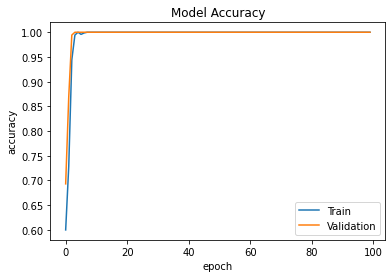

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

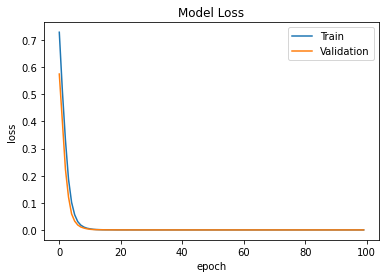

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [70]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [71]:
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


In [72]:
test_data.isnull().sum()

VWTI    0
SWTI    0
CWTI    0
EI      0
dtype: int64

In [73]:
pre=model.predict(test_data)

In [74]:
def fun(x):

    if x == 1:
        return 1       
    else:
      return 0


In [75]:
for i in range(len(pre)):
  pre[i]=fun(pre[i]);

In [76]:
res = pd.DataFrame(pre)
res.index = test_data.index # its important for comparison
res.columns = ["pre"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>